# **Customer Personality Analysis Using Python**

* **Industry:** Business/Marketing Industry
* **Dataset:** Marketing Campaign Dataset
* **Source**: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


#### **Introduction**
The data contained in the dataset is vital for a business to have an understanding about their customers, making it easy for them to modify products according to customer age, locations, behaviours among others, plan marketing strategies and address concerns of customers, according to the findings in the data.

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

## **Read In Marketing Campaign Dataset**

In [2]:
market_df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

I would like to make a copy of the original dataset and work with the copy instead in order to maintain the integrity of the original dataset incase i make a mistake.

In [3]:
# Copy Of Original Dataset
mdf = market_df.copy()
mdf.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1869,2186,1977,2n Cycle,Together,82326.0,0,0,10-03-2014,30,938,...,2,0,1,1,1,0,0,3,11,1
1204,2995,1957,Master,Together,66636.0,0,0,17-08-2013,64,291,...,1,0,0,0,0,0,0,3,11,0
1273,635,1966,Master,Married,57183.0,1,1,19-03-2013,51,464,...,8,0,0,0,0,0,0,3,11,0
918,2625,1954,2n Cycle,Single,42607.0,0,1,17-11-2013,30,156,...,3,0,0,0,0,0,0,3,11,0
1385,10909,1948,Graduation,Married,92344.0,0,0,15-01-2014,9,992,...,1,1,0,1,0,0,0,3,11,0
2123,4915,1956,2n Cycle,Married,53230.0,0,1,03-08-2012,86,176,...,5,0,0,0,0,0,0,3,11,0
1966,7165,1972,Graduation,Together,64474.0,0,1,22-10-2013,59,381,...,5,0,0,0,0,0,0,3,11,0
1058,4507,1952,Graduation,Single,72228.0,0,0,27-11-2012,87,631,...,3,0,0,0,0,0,0,3,11,0
2222,10659,1979,2n Cycle,Together,7500.0,1,0,07-05-2013,7,2,...,7,0,0,0,0,0,0,3,11,0
468,9697,1951,Graduation,Married,53790.0,0,2,06-03-2014,86,335,...,6,0,0,0,0,0,0,3,11,0


## **Data Profiling**

In [4]:
mdf.shape

(2240, 29)

In [5]:
print('There are 29 columns and 2240 rows in the data set')

There are 29 columns and 2240 rows in the data set


In [6]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

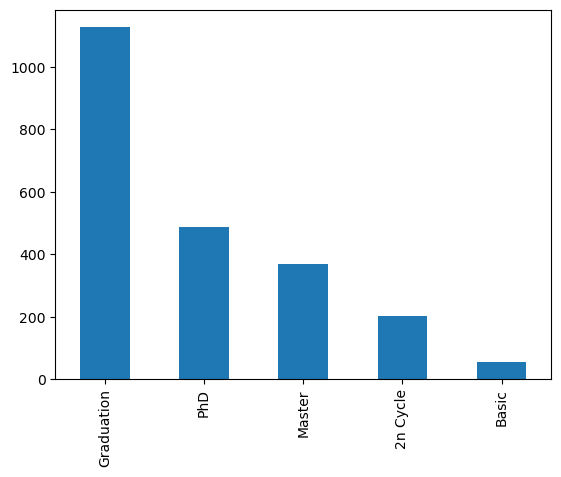

In [8]:
mdf['Education'].value_counts().plot(kind='bar')

<Axes: >

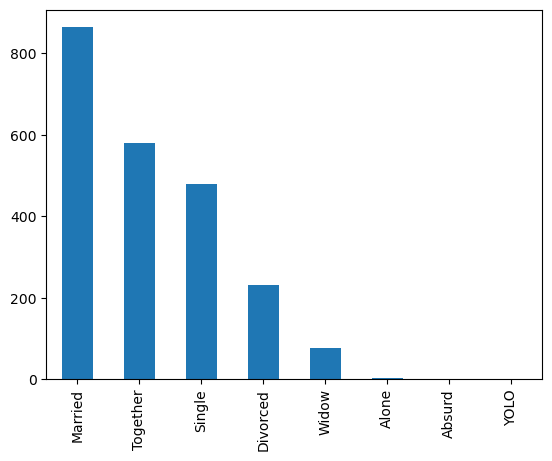

In [9]:
mdf['Marital_Status'].value_counts().plot(kind='bar')

## **Data Cleaning, Shaping and Standardization**

To begin, i would like to select only the columns i would need for my analysis:

In [10]:
mdf = mdf[[
       'ID','Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 
     #'Dt_Customer', 'Recency', 
       'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 
     #'NumDealsPurchases', 
       'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 
     #'NumWebVisitsMonth',
     #'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 
       'Complain', 
     #'Z_CostContact', 'Z_Revenue', 'Response'
 ]]
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

Adding an Age Column: I will subtract each customers year of birth from this year to get their ages.

In [11]:
mdf['Age'] = date.today().year - mdf.Year_Birth
mdf[['Year_Birth','Age']].sample(5)

,Year_Birth,Age
1904,1968,55
1595,1973,50
825,1959,64
130,1952,71
501,1961,62


Standardizing the values in the Education column to print only 'Basic', 'Bachelor', 'Master' and 'PHD' by setting 'Graduation' to 'Bachelor', and '2n Cycle' to 'Master':

In [12]:
for n in mdf.index:
    if mdf.loc[n,'Education'] == 'Graduation':
        mdf.loc[n, 'Education']= 'Bachelor'
    elif mdf.loc[n,'Education'] == '2n Cycle':
        mdf.loc[n, 'Education']= 'Master'

Text(0, 0.5, 'Frequency Counts')

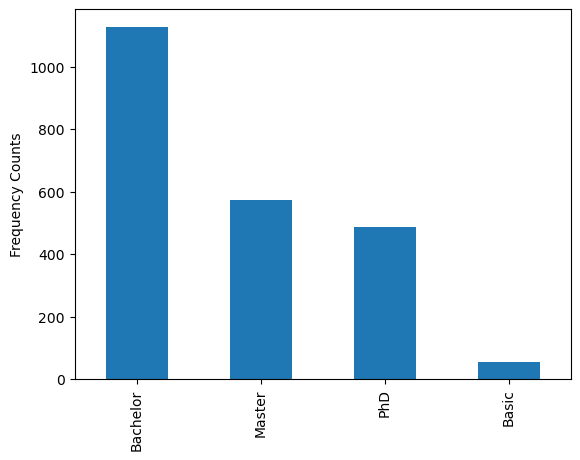

In [13]:
ax = mdf.Education.value_counts().plot(kind='bar')
ax.set_ylabel("Frequency Counts")

Now i will standardize the values in the Marital_Status column to print only 'Single', 'Married', 'Divorced', 'Widow' and 'Other' by setting 'Alone' to single and 'Together', 'Absurd' and 'YOLO' to 'Other':

In [14]:
for n in mdf.index:
    if mdf.loc[n, 'Marital_Status'] == 'Alone':
        mdf.loc[n, 'Marital_Status'] = 'Single'
    elif mdf.loc[n, 'Marital_Status'] in ['Together','Absurd','YOLO']:
        mdf.loc[n, 'Marital_Status'] = 'Other'

Text(0, 0.5, 'Frequency Counts')

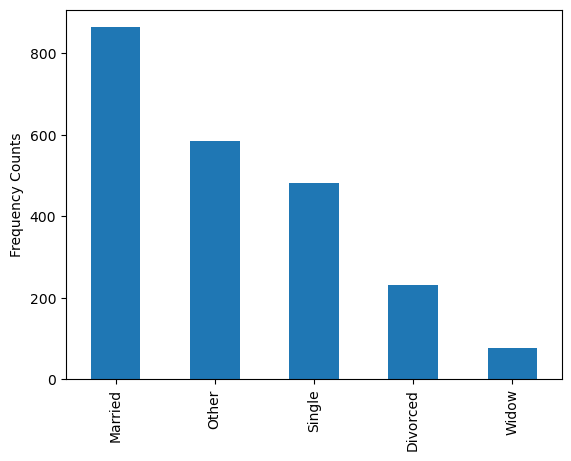

In [15]:
ax = mdf.Marital_Status.value_counts().plot(kind='bar')
ax.set_ylabel("Frequency Counts")

I would like to combine (sum) the 'KidHome' and 'TeenHome' Columns and set them to a 'No_Of_Kids' Column:

In [16]:
mdf['No_Of_Kids'] = mdf.Kidhome + mdf.Teenhome
mdf.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Age,No_Of_Kids
1070,10536,1971,PhD,Other,32892.0,1,0,26,0,15,2,1,2,3,0,3,0,52,1
1931,2878,1947,PhD,Married,67472.0,0,1,162,31,127,8,17,69,4,2,7,0,76,1
1387,8702,1976,Master,Other,26907.0,1,1,9,1,7,0,3,2,1,0,3,0,47,2
1766,10560,1980,PhD,Single,36802.0,1,0,16,1,2,0,0,1,1,0,3,0,43,1
1943,10413,1984,Bachelor,Married,72570.0,0,0,274,83,216,151,141,224,4,6,12,0,39,0
734,10430,1973,Bachelor,Divorced,89694.0,1,1,1126,28,211,37,28,42,4,3,4,0,50,2
1239,286,1952,Bachelor,Single,44213.0,1,1,95,11,35,0,4,7,2,1,5,0,71,2
917,8362,1982,PhD,Married,84169.0,0,0,1478,19,403,0,19,0,7,6,6,0,41,0
1408,8783,1950,Bachelor,Married,57045.0,0,1,296,13,104,11,13,17,4,2,9,0,73,1
708,3336,1948,PhD,Other,66375.0,0,1,712,0,45,0,0,191,2,4,5,0,75,1


I Will drop both 'KidHome' and 'TeenHome' columns as I wont be needing them anymore:

In [17]:
mdf.drop(['Kidhome','Teenhome'], inplace=True, axis=1)

In [18]:
for columns in mdf.columns:
    print(columns)

ID
Year_Birth
Education
Marital_Status
Income
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
Complain
Age
No_Of_Kids


I Would like to rename a couple of columns:

In [19]:
new_names = {'MntWines':'Wines','MntFruits':'Fruits', 'MntMeatProducts':'Meat', 
    'MntFishProducts':'Fish', 'MntSweetProducts':'Sweet_Products',
    'MntGoldProds':'Gold_Products', 'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog',
    'NumStorePurchases':'Store', 'Complain':'Complained?'}

mdf.rename(columns=new_names, inplace=True)

I Want to rearrange my columns before I continue the cleaning process:

In [20]:
mdf = mdf[[
    'ID','Year_Birth','Age','Education','Marital_Status',
    'No_Of_Kids','Income','Wines','Fruits', 'Meat', 
    'Fish', 'Sweet_Products', 'Gold_Products', 
    'Web','Catalog', 'Store', 'Complained?'
]]

mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Year_Birth      2240 non-null   int64  
 2   Age             2240 non-null   int64  
 3   Education       2240 non-null   object 
 4   Marital_Status  2240 non-null   object 
 5   No_Of_Kids      2240 non-null   int64  
 6   Income          2216 non-null   float64
 7   Wines           2240 non-null   int64  
 8   Fruits          2240 non-null   int64  
 9   Meat            2240 non-null   int64  
 10  Fish            2240 non-null   int64  
 11  Sweet_Products  2240 non-null   int64  
 12  Gold_Products   2240 non-null   int64  
 13  Web             2240 non-null   int64  
 14  Catalog         2240 non-null   int64  
 15  Store           2240 non-null   int64  
 16  Complained?     2240 non-null   int64  
dtypes: float64(1), int64(14), object(

In [21]:
mdf['Complained?'].value_counts()

0    2219
1      21
Name: Complained?, dtype: int64

##### **Now I will carefully explore the dataset for nulls, missing data, outliers and duplicates that dont make sense:**

Lets find out if we have any N/A's i.e missing data, in our dataset:

In [22]:
mdf.isna().sum()

ID                 0
Year_Birth         0
Age                0
Education          0
Marital_Status     0
No_Of_Kids         0
Income            24
Wines              0
Fruits             0
Meat               0
Fish               0
Sweet_Products     0
Gold_Products      0
Web                0
Catalog            0
Store              0
Complained?        0
dtype: int64

There 24 missing values in the Income column, I will filter them out and peruse them:

In [23]:
mdf[mdf.Income.isna()]

,ID,Year_Birth,Age,Education,Marital_Status,No_Of_Kids,Income,Wines,Fruits,Meat,Fish,Sweet_Products,Gold_Products,Web,Catalog,Store,Complained?
10,1994,1983,40,Bachelor,Married,1,NaN,5,5,6,0,2,1,1,0,2,0
27,5255,1986,37,Bachelor,Single,1,NaN,5,1,3,3,263,362,27,0,0,0
43,7281,1959,64,PhD,Single,0,NaN,81,11,50,3,2,39,1,3,4,0
48,7244,1951,72,Bachelor,Single,3,NaN,48,5,48,6,10,7,2,1,4,0
58,8557,1982,41,Bachelor,Single,1,NaN,11,3,22,2,2,6,2,0,3,0
71,10629,1973,50,Master,Married,1,NaN,25,3,43,17,4,17,3,0,3,0
90,8996,1957,66,PhD,Married,3,NaN,230,42,192,49,37,53,7,2,8,0
91,9235,1957,66,Bachelor,Single,2,NaN,7,0,8,2,0,1,1,0,2,0
92,5798,1973,50,Master,Other,0,NaN,445,37,359,98,28,18,2,4,8,0
128,8268,1961,62,PhD,Married,1,NaN,352,0,27,10,0,15,6,1,7,0


I Will drop the records above seeing that they are only 24 and hence dropping them will not have a significantly negative impact on analysis. I would set the inverse i.e the dataframe that doesnt contain null values in the income column, to my main dataframe by using the **Tilde(~)** symbol: 

In [24]:
mdf = mdf[~mdf.Income.isna()]
mdf.isna().sum()

ID                0
Year_Birth        0
Age               0
Education         0
Marital_Status    0
No_Of_Kids        0
Income            0
Wines             0
Fruits            0
Meat              0
Fish              0
Sweet_Products    0
Gold_Products     0
Web               0
Catalog           0
Store             0
Complained?       0
dtype: int64

Lets now see if we have empty cells in our dataset:

In [25]:
mdf.isnull().sum()

ID                0
Year_Birth        0
Age               0
Education         0
Marital_Status    0
No_Of_Kids        0
Income            0
Wines             0
Fruits            0
Meat              0
Fish              0
Sweet_Products    0
Gold_Products     0
Web               0
Catalog           0
Store             0
Complained?       0
dtype: int64

There are no empty cells, how about duplicate values?:

In [26]:
mdf.duplicated().value_counts()

False    2216
dtype: int64

I would like to see if I have any outliers in my Age column before I proceed:

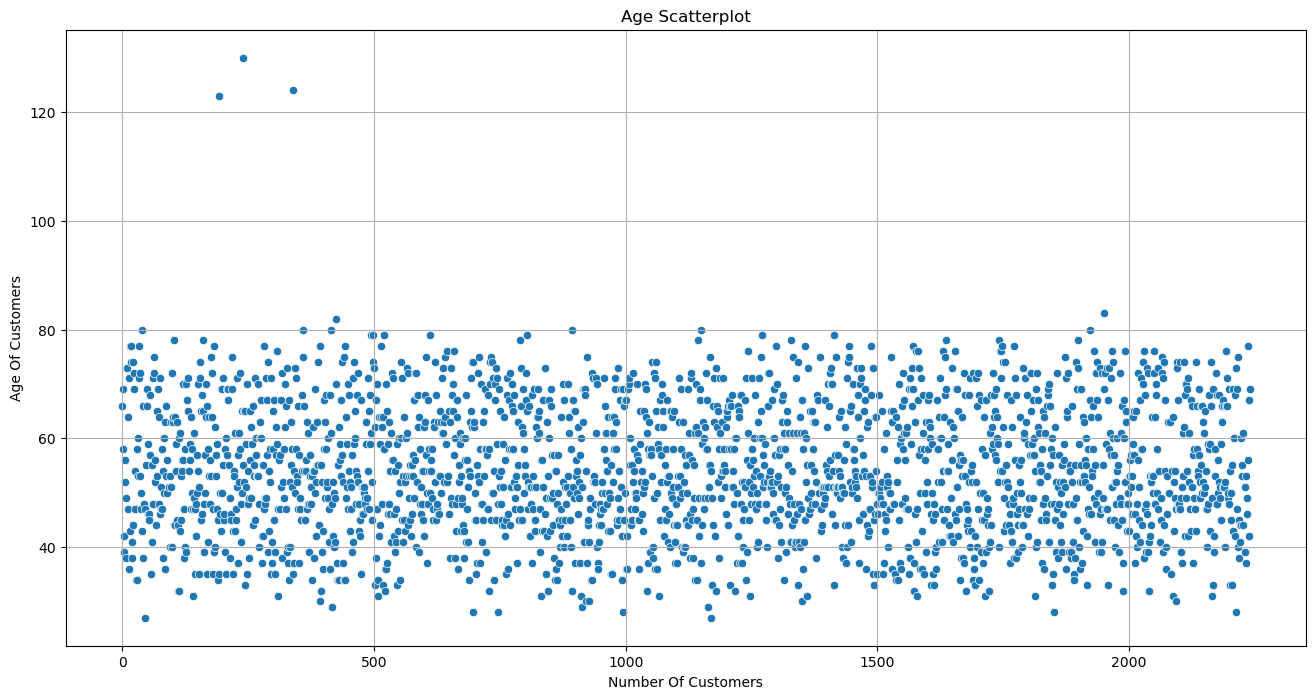

In [27]:
plt.figure(figsize=(16,8))
sns.scatterplot(mdf.Age)
plt.grid(True)
plt.xlabel('Number Of Customers')
plt.ylabel('Age Of Customers')
plt.title('Age Scatterplot');

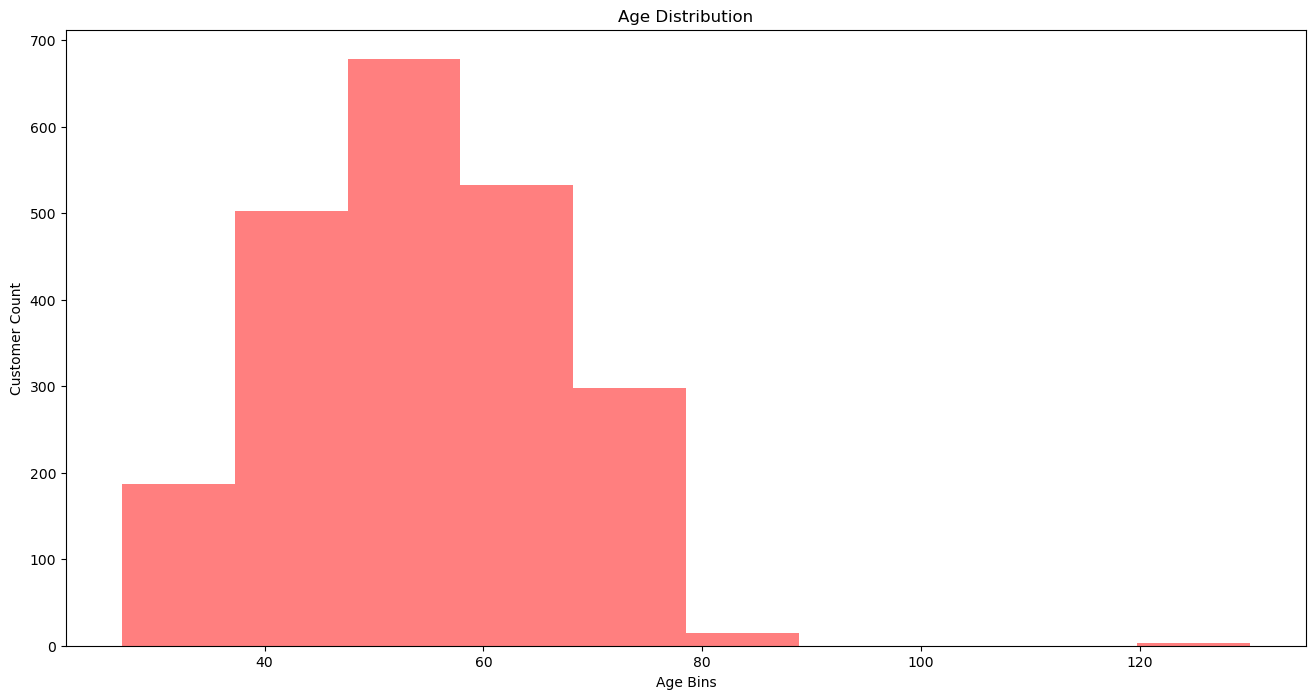

In [28]:
plt.figure(figsize=(16,8))
plt.hist(mdf.Age,color='r',alpha=0.5)
plt.xlabel('Age Bins')
plt.ylabel('Customer Count')
plt.title("Age Distribution");

We can clearly see that there a 3 ages in our dataset that are extremely larger than the others, i will investigate further to ascertain whether to drop those records or not:

In [29]:
mdf[mdf.Age > 100]

,ID,Year_Birth,Age,Education,Marital_Status,No_Of_Kids,Income,Wines,Fruits,Meat,Fish,Sweet_Products,Gold_Products,Web,Catalog,Store,Complained?
192,7829,1900,123,Master,Divorced,1,36640.0,15,6,8,7,4,25,2,1,2,1
239,11004,1893,130,Master,Single,1,60182.0,8,0,5,7,0,2,1,0,2,0
339,1150,1899,124,PhD,Other,0,83532.0,755,144,562,104,64,224,4,6,4,0


Ages 130, 124 and 123 years are extremely high, though these ages maybe true, i will still opt to drop them because they will skew the results of some statistical metrics like the mean of the age column.

In [30]:
mdf.drop(mdf[mdf.Age > 100].index, inplace=True)

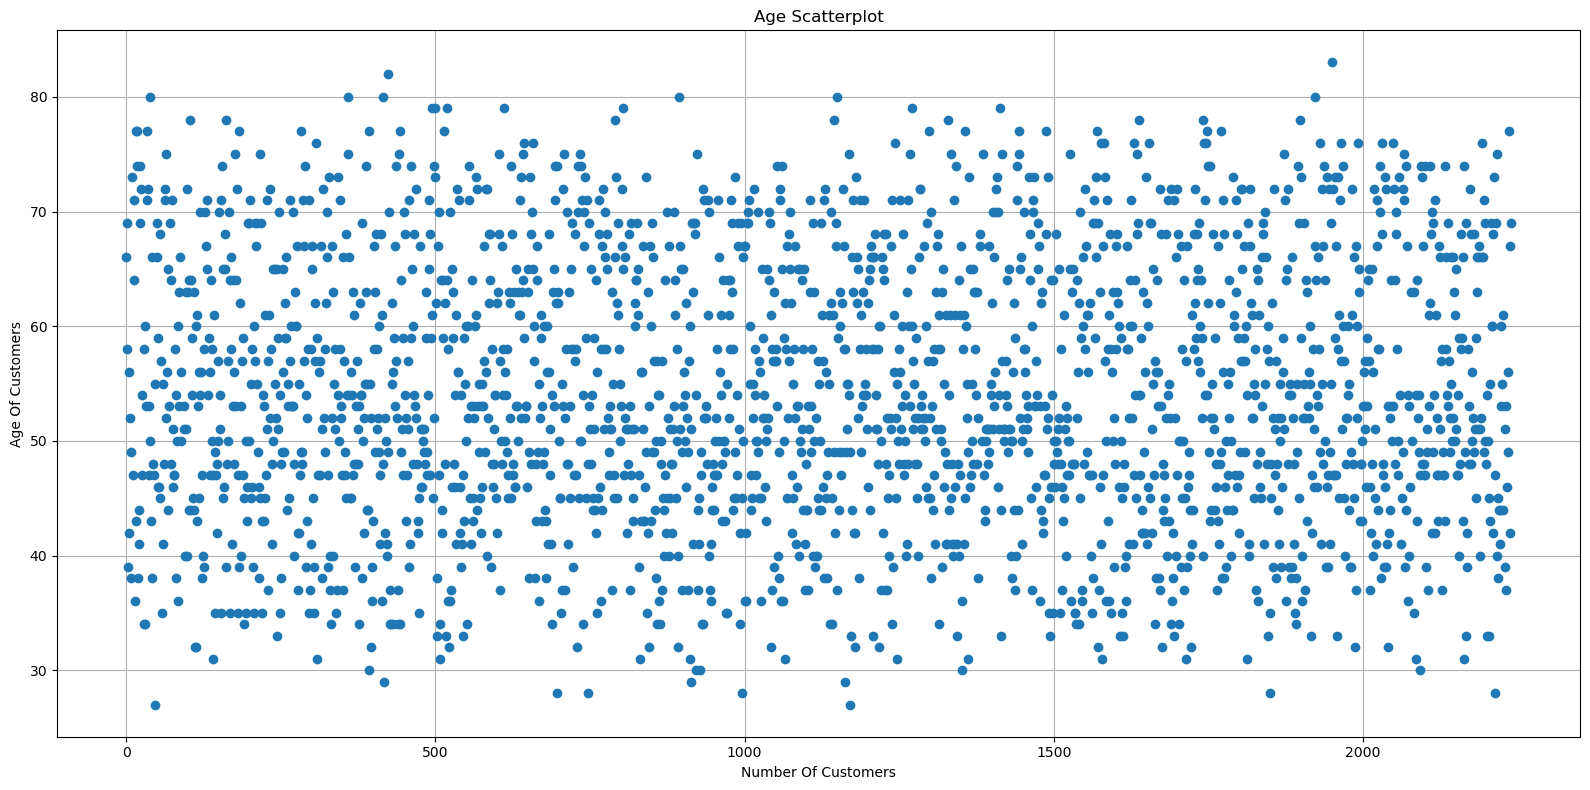

In [31]:
plt.figure(figsize=(16,8))
plt.plot(mdf.Age,'o')
plt.grid(True)
plt.xlabel('Number Of Customers')
plt.ylabel('Age Of Customers')
plt.title('Age Scatterplot')
plt.tight_layout();

In [32]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2213 non-null   int64  
 1   Year_Birth      2213 non-null   int64  
 2   Age             2213 non-null   int64  
 3   Education       2213 non-null   object 
 4   Marital_Status  2213 non-null   object 
 5   No_Of_Kids      2213 non-null   int64  
 6   Income          2213 non-null   float64
 7   Wines           2213 non-null   int64  
 8   Fruits          2213 non-null   int64  
 9   Meat            2213 non-null   int64  
 10  Fish            2213 non-null   int64  
 11  Sweet_Products  2213 non-null   int64  
 12  Gold_Products   2213 non-null   int64  
 13  Web             2213 non-null   int64  
 14  Catalog         2213 non-null   int64  
 15  Store           2213 non-null   int64  
 16  Complained?     2213 non-null   int64  
dtypes: float64(1), int64(14), object(

In [33]:
mdf.sample(10)

,ID,Year_Birth,Age,Education,Marital_Status,No_Of_Kids,Income,Wines,Fruits,Meat,Fish,Sweet_Products,Gold_Products,Web,Catalog,Store,Complained?
1162,6218,1965,58,Bachelor,Married,1,59594.0,457,4,29,0,0,9,8,1,7,0
1790,1419,1950,73,Bachelor,Other,2,34026.0,18,6,15,12,8,17,2,1,3,0
547,4368,1980,43,Bachelor,Married,1,47850.0,42,7,43,20,12,10,3,0,4,0
140,821,1992,31,Master,Single,0,92859.0,962,61,921,52,61,20,5,4,12,0
1389,2963,1979,44,Bachelor,Other,0,75507.0,709,93,374,104,80,80,8,6,6,0
54,9381,1978,45,Bachelor,Married,2,66373.0,328,9,124,12,24,109,4,2,10,0
1633,10207,1978,45,Bachelor,Other,1,22775.0,5,1,8,0,0,1,1,0,2,0
690,7230,1960,63,PhD,Divorced,1,50611.0,459,0,24,6,0,4,4,5,7,0
1549,2217,1975,48,Master,Married,2,37284.0,11,1,2,2,1,6,0,0,3,0
374,1519,1972,51,PhD,Single,2,38578.0,38,4,22,3,3,3,3,0,3,0


## **Exploratory Data Analysis And Visualization**

Now that the data is clean, I would proceed to analysis:

## Key Dataset Metrics

In [34]:
# Average Age Of Customers
avg_age = np.round(mdf.Age.mean(),1)

In [35]:
# Total Spent By Customers
total_spent = sum(mdf.Wines) + sum(mdf.Meat) + sum(mdf.Fish) + sum(mdf.Sweet_Products) + sum(mdf.Gold_Products) + sum(mdf.Fruits)

In [36]:
# Total Customers
tot_customers = sum(mdf.index.value_counts())

In [37]:
# Total Customer Income
tot_income = sum(mdf.Income)

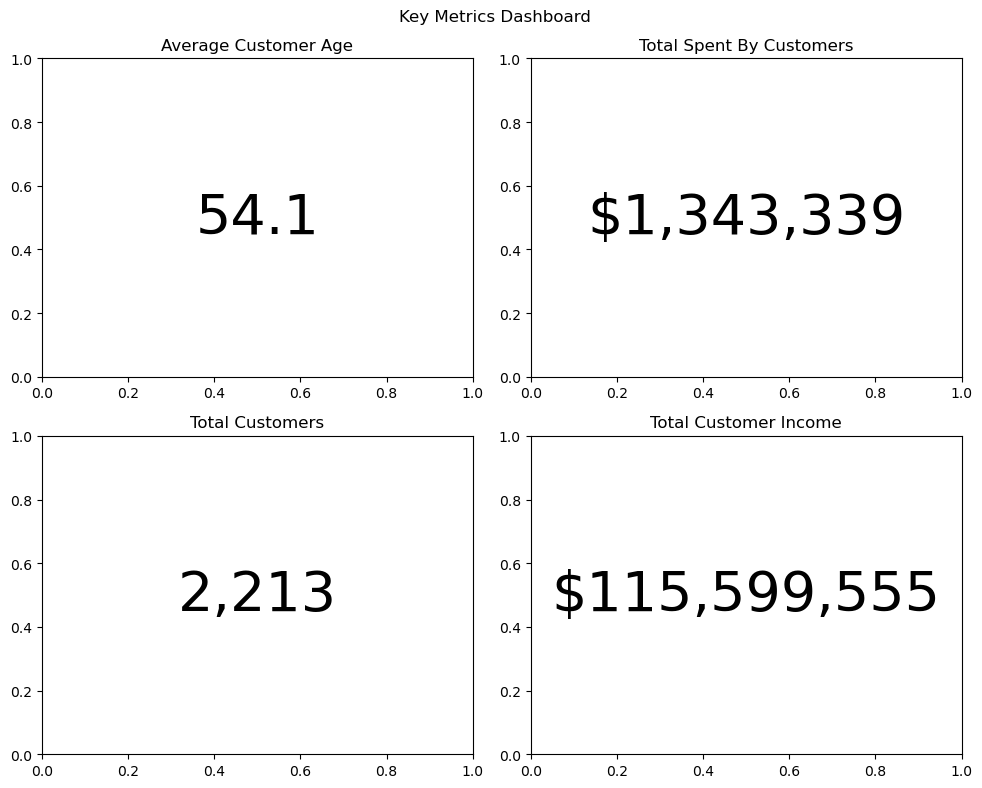

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Add text to each subplot to display a metric
axs[0, 0].text(0.5, 0.5,avg_age,ha='center',va='center',fontsize=40)
axs[0, 0].set_title('Average Customer Age')
axs[0, 1].text(0.5, 0.5, f"${total_spent:,}",ha='center',va='center',fontsize=40)
axs[0, 1].set_title("Total Spent By Customers")
axs[1, 0].text(0.5, 0.5, f"{tot_customers:,}",ha='center',va='center',fontsize=40)
axs[1, 0].set_title("Total Customers")
axs[1, 1].text(0.5, 0.5, f"${tot_income:,.0f}",va='center',ha='center',fontsize=40)
axs[1, 1].set_title("Total Customer Income")

# Set the title for the whole figure
fig.suptitle("Key Metrics Dashboard")

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()

## Total Amount Spent By Customer Age:

In [39]:
age_grp = mdf.groupby('Age')
age_df = age_grp[['Wines','Meat','Fish','Fruits','Sweet_Products','Gold_Products']].sum()
age_df['total'] = age_df['Wines'] + age_df['Fish'] + age_df['Fruits'] + age_df['Meat'] + age_df['Sweet_Products'] + age_df['Gold_Products']

In [40]:
age_df.nlargest(7, 'total')

,Wines,Meat,Fish,Fruits,Sweet_Products,Gold_Products,total
Age,,,,,,,
53,25400,14554,3386,2572,2425,3600,51937
48,25183,10588,3768,2313,2766,3433,48051
51,22802,12669,2551,1966,1824,3717,45529
47,23158,12151,2730,2004,1782,3325,45150
54,23803,12260,2593,1762,1553,3059,45030
58,23186,11416,2395,2133,2241,3414,44785
52,23040,11258,2710,1975,2285,2844,44112


In [41]:
age_df.nsmallest(5, 'total')

,Wines,Meat,Fish,Fruits,Sweet_Products,Gold_Products,total
Age,,,,,,,
27,3,16,18,18,25,58,138
83,144,7,0,0,0,6,157
82,1285,716,55,42,0,21,2119
28,1421,1615,252,99,268,151,3806
29,1977,1776,336,100,79,104,4372


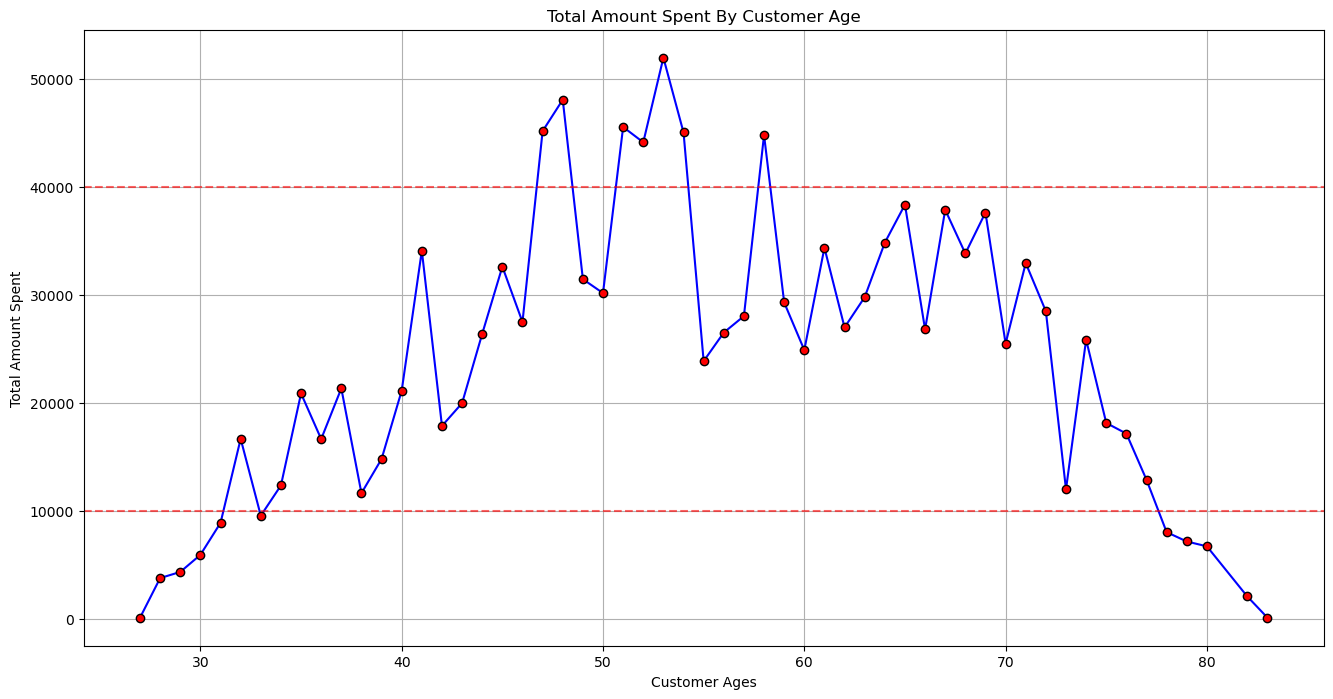

In [42]:
plt.figure(figsize=(16,8))
plt.plot(age_df.index, age_df.total,'o-b',mec='black',mfc='r')
plt.title('Total Amount Spent By Customer Age')
plt.xlabel('Customer Ages')
plt.ylabel('Total Amount Spent')
plt.grid(visible=True)
plt.axhline(40000,linewidth=1.5,linestyle='--',color='r',alpha=0.6)
plt.axhline(10000,linewidth=1.5,linestyle='--',color='r',alpha=0.6);

* We can clearly see that the highest spenders lie within the late 40's late 50's age range with 53 year olds being the overall top spenders with $51,937.

* Another interesting trend I am seeing is how spending is at a minimum at the extreme ends of the age spectrum where those in the 20's to mid 30's age range are spending less probably because life has just started and their purchasing power is on the low side (27 year olds are the lowest spenders at $138),however there is clearly a sturdy increase as age increases, as well as those in the mid 70's to 80+ age ranges probably because age has caught up with them and some of the products in the data set are no longer relevant to them.

## Total Amount In Sales By Education Level:

In [43]:
edu_grp = mdf.groupby('Education')
edu_df = edu_grp[['Wines','Meat','Fish','Fruits','Sweet_Products','Gold_Products']].sum()
edu_df['total'] = edu_df['Wines'] + edu_df['Fish'] + edu_df['Fruits'] + edu_df['Meat'] + edu_df['Sweet_Products'] + edu_df['Gold_Products']

In [44]:
edu_df = edu_df.sort_values(by='total',ascending=True)
edu_df

,Wines,Meat,Fish,Fruits,Sweet_Products,Gold_Products,total
Education,,,,,,,
Basic,391,618,921,600,654,1233,4417
Master,161684,86469,21089,13668,14536,24018,321464
PhD,195119,81082,12824,9546,9723,15362,323656
Bachelor,318111,201319,48453,34441,34915,56563,693802


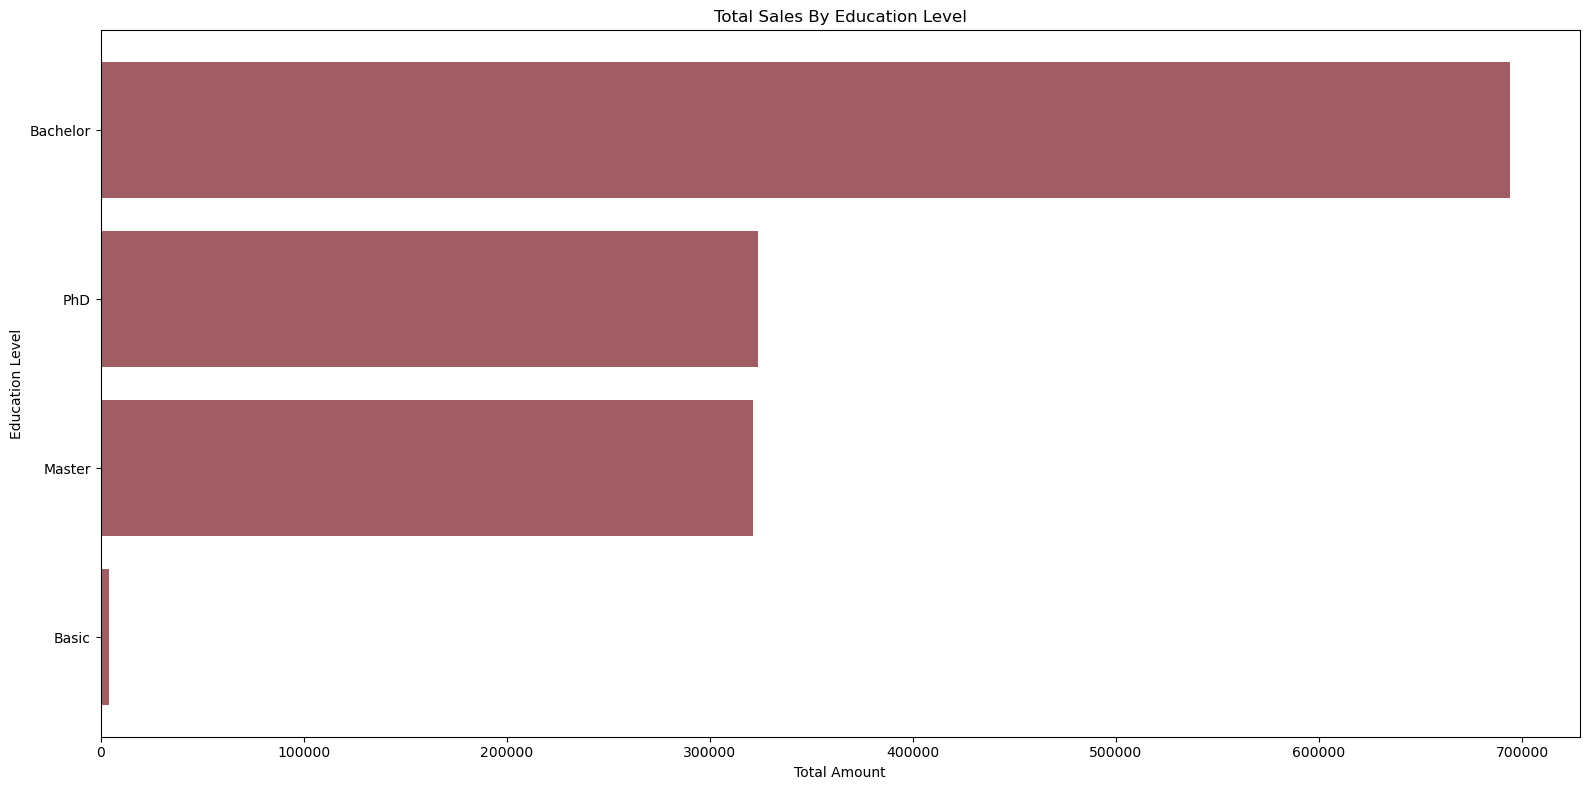

In [45]:
plt.figure(figsize=(16,8))
plt.barh(y=edu_df.index, width= edu_df.total,color='#a15d64')
plt.xlabel("Total Amount")
plt.ylabel("Education Level")
plt.title("Total Sales By Education Level")
plt.tight_layout();

* Customers with a bachelors degree were the highest spenders with $693,802.

* While the lowest were customers with a basic level of education at $4,417.

## Total Amount Spent Per Product By Customers:

In [46]:
products = mdf[['Wines','Meat','Fish','Fruits','Sweet_Products','Gold_Products']]
products = pd.melt(products,value_vars=['Wines','Meat','Fish','Fruits','Sweet_Products','Gold_Products'],
                   value_name='Amount',var_name='Product'
                   )

In [47]:
prd_grp = products.groupby('Product')
prd_df = prd_grp[['Amount']].sum().sort_values(by='Amount',ascending=False)
prd_df

,Amount
Product,
Wines,675305
Meat,369488
Gold_Products,97176
Fish,83287
Sweet_Products,59828
Fruits,58255


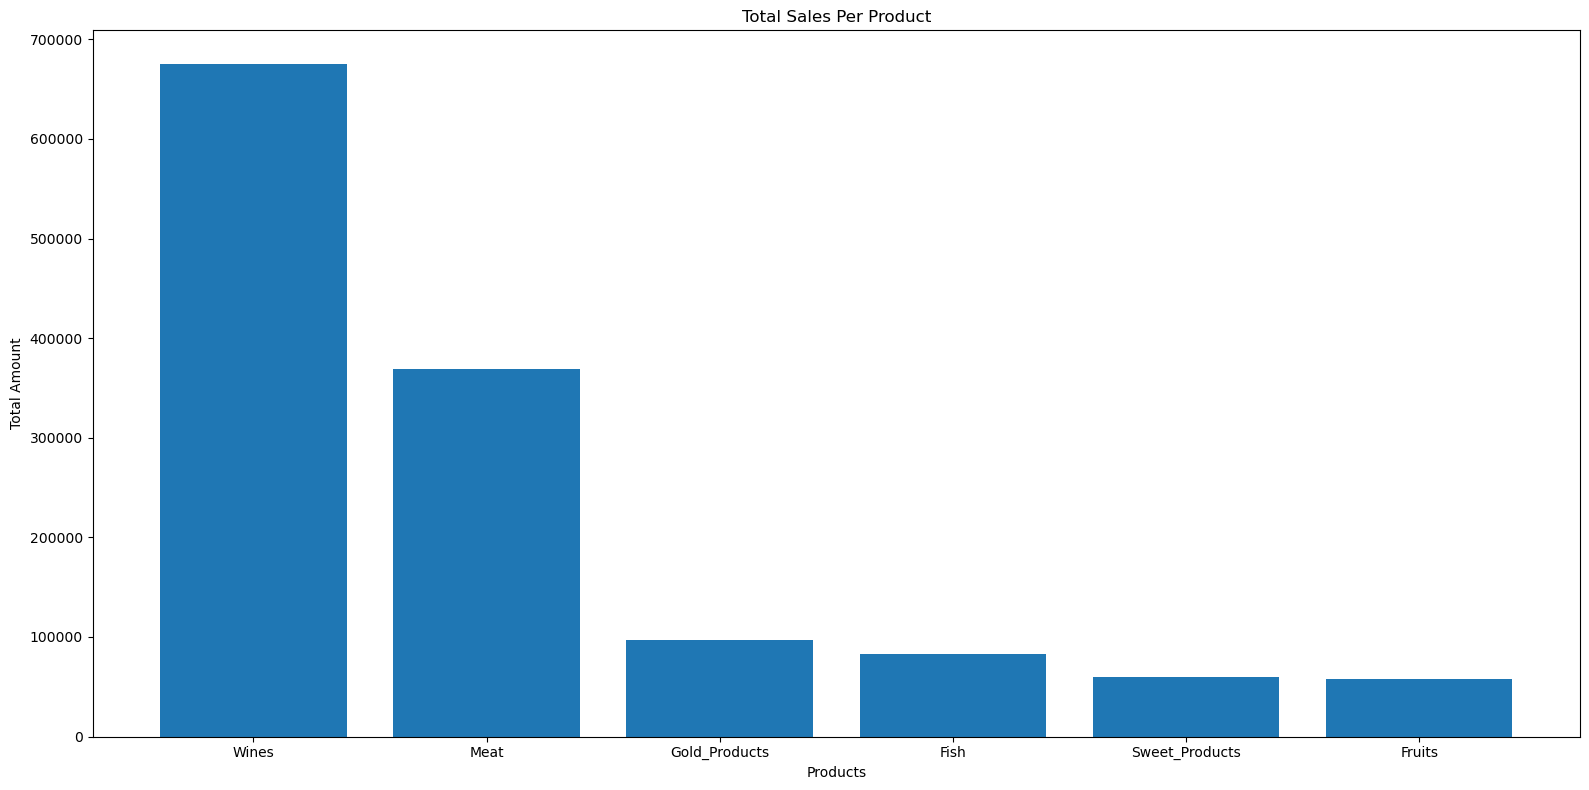

In [48]:
plt.figure(figsize=(16,8))
plt.bar(x=prd_df.index, height= prd_df.Amount)
plt.ylabel("Total Amount")
plt.xlabel("Products")
plt.title("Total Sales Per Product")
plt.tight_layout();

* **Wines** generated the most sales amount at $675,305 

* While **Fruits** generated the least at $58,255.

## Most Used Sales Channel i.e Store, Website Or Catalog?:

In [49]:
sales_channel = mdf[['Store','Web','Catalog']]
sales_channel = pd.melt(sales_channel, value_vars=['Store','Web','Catalog'],
                        var_name='Channel',value_name='No_Transactions'
                        )

In [50]:
channel_grp = sales_channel.groupby('Channel')
sc_df = channel_grp[['No_Transactions']].sum()
sc_df

,No_Transactions
Channel,
Catalog,5912
Store,12847
Web,9046


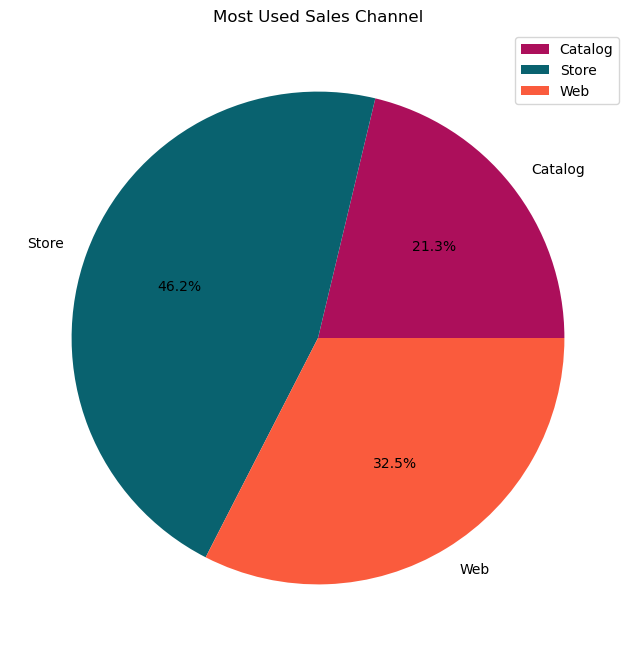

In [51]:
plt.figure(figsize=(16,8))
plt.pie(x=sc_df.No_Transactions,labels=sc_df.index,colors=['#ac0f5b','#09626f','#fa5b3d'],autopct='%1.1f%%')
plt.legend()
plt.title('Most Used Sales Channel');

The **Store sale channel** was the most used by customers, recording **12,847 (46.2%) transactions** for the period, while the **least used channel** was the **catalog** which contributed only **21.3% to total transactions (5,912 transactions)**.

## Complained?:

In [52]:
complaints = mdf[['Complained?']]

In [53]:
complaints_grp = complaints.groupby('Complained?').value_counts()
complaints_grp

Complained?
0    2193
1      20
dtype: int64

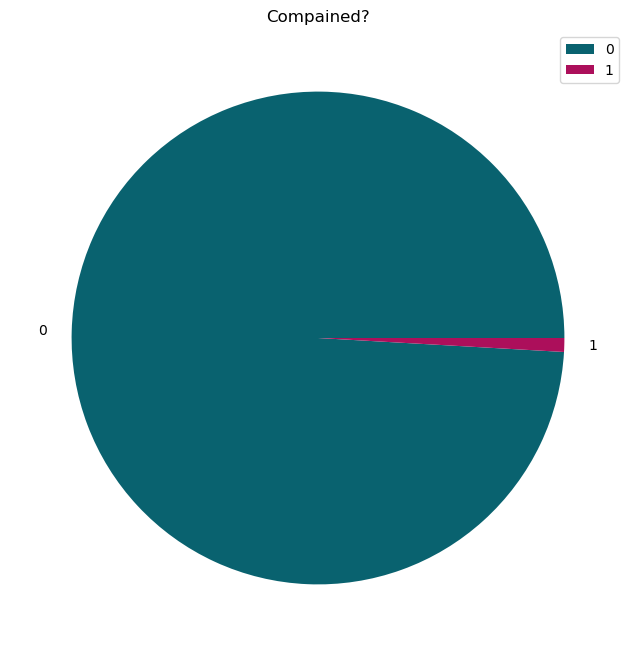

In [54]:
plt.figure(figsize=(16,8))
plt.pie(complaints_grp, labels=complaints_grp.index, colors=['#09626f','#ac0f5b'],radius=1)
plt.title('Compained?')
plt.legend();

Only a handful of customers had complaints(**20 customers**), whereas **2,193 customers** didnt have any complaints.

## Total Amount Spent Vs Number Of Kids Per Marital Status:

In [55]:
spent_kids_status = mdf[['Marital_Status','No_Of_Kids','Wines','Meat','Fish','Fruits','Sweet_Products','Gold_Products']]
spent_kids_status = pd.melt(spent_kids_status,
                            id_vars=['Marital_Status','No_Of_Kids'],
                            value_vars=['Wines','Meat','Fish','Fruits','Sweet_Products','Gold_Products'],
                            value_name="Amount",
                            var_name="Products"
                            )

In [56]:
status_grp = spent_kids_status.groupby('Marital_Status')
status_df = status_grp[['Amount','No_Of_Kids']].sum()
status_df

,Amount,No_Of_Kids
Marital_Status,,
Divorced,141601,1392
Married,506885,4962
Other,350249,3378
Single,289279,2448
Widow,55325,402


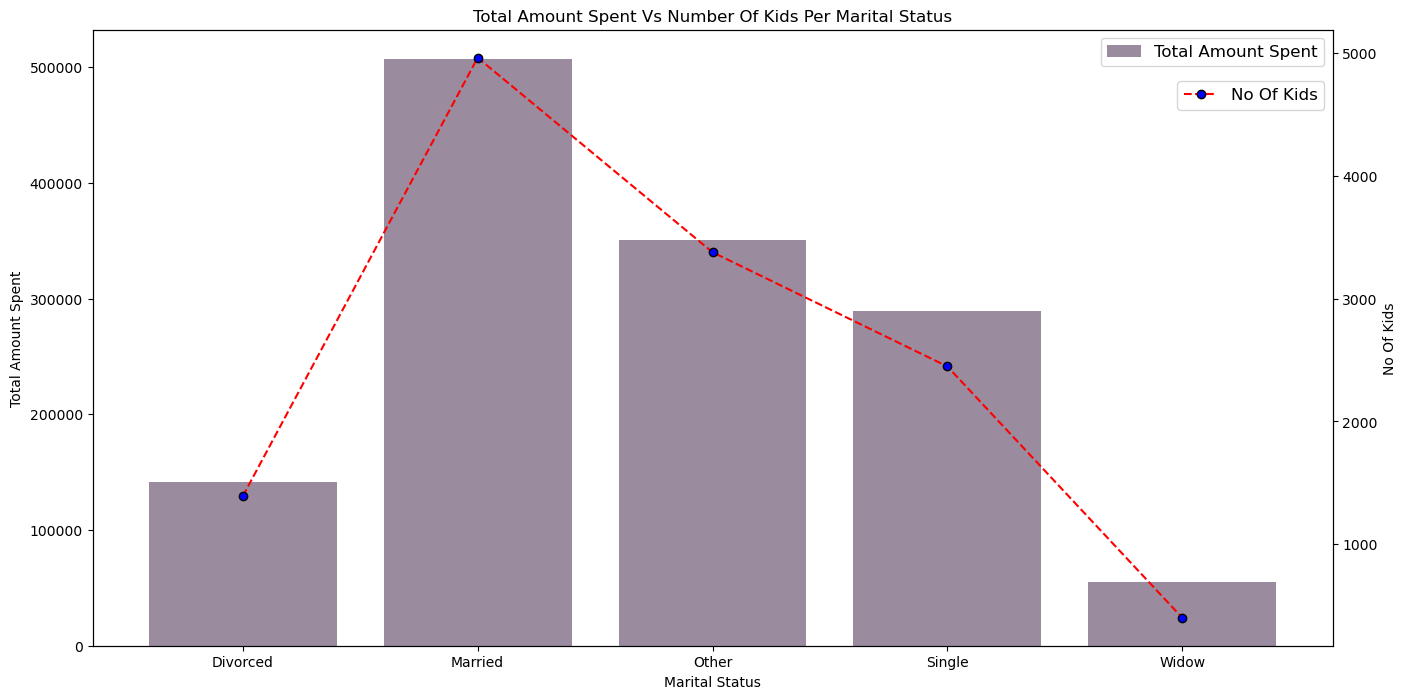

In [57]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.bar(status_df.index, status_df.Amount, color='#715a77',alpha=0.7)
ax1.set_ylabel('Total Amount Spent')
ax2 = ax1.twinx()
ax2.plot(status_df.index, status_df.No_Of_Kids,color='r',marker='o',mfc='b',mec='black',linestyle='--')
ax2.set_ylabel('No Of Kids')
plt.title("Total Amount Spent Vs Number Of Kids Per Marital Status")
ax1.set_xlabel("Marital Status")
ax1.legend(['Total Amount Spent'], loc='upper right',bbox_to_anchor=(1, 1), prop={'size': 12})
ax2.legend(['No Of Kids'], loc='upper right',bbox_to_anchor=(1, 0.93), prop={'size': 12});

* We can clearly see that there is a pattern where the higher the number of kids, the more money customers spend and vice versa.
* The married group of customers recorded the most money spent at $506,885 as well as the most number of children in total with 4,962 children. 

* While the widows recorded the least figures in total amount spent and total number of children at $55,325 and 402 kids respectively.

In [58]:
mdf.head()

,ID,Year_Birth,Age,Education,Marital_Status,No_Of_Kids,Income,Wines,Fruits,Meat,Fish,Sweet_Products,Gold_Products,Web,Catalog,Store,Complained?
0,5524,1957,66,Bachelor,Single,0,58138.0,635,88,546,172,88,88,8,10,4,0
1,2174,1954,69,Bachelor,Single,2,46344.0,11,1,6,2,1,6,1,1,2,0
2,4141,1965,58,Bachelor,Other,0,71613.0,426,49,127,111,21,42,8,2,10,0
3,6182,1984,39,Bachelor,Other,1,26646.0,11,4,20,10,3,5,2,0,4,0
4,5324,1981,42,PhD,Married,1,58293.0,173,43,118,46,27,15,5,3,6,0


In [59]:
from sklearn.preprocessing import LabelEncoder

le_edu = LabelEncoder()
mdf.Education = le_edu.fit_transform(mdf.Education)

le_ms = LabelEncoder()
mdf.Marital_Status = le_ms.fit_transform(mdf.Marital_Status)

In [60]:
mdf.head()

,ID,Year_Birth,Age,Education,Marital_Status,No_Of_Kids,Income,Wines,Fruits,Meat,Fish,Sweet_Products,Gold_Products,Web,Catalog,Store,Complained?
0,5524,1957,66,0,3,0,58138.0,635,88,546,172,88,88,8,10,4,0
1,2174,1954,69,0,3,2,46344.0,11,1,6,2,1,6,1,1,2,0
2,4141,1965,58,0,2,0,71613.0,426,49,127,111,21,42,8,2,10,0
3,6182,1984,39,0,2,1,26646.0,11,4,20,10,3,5,2,0,4,0
4,5324,1981,42,3,1,1,58293.0,173,43,118,46,27,15,5,3,6,0


In [61]:
data = mdf.drop(['ID','Year_Birth'],axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Scaler = MinMaxScaler()
data_scaled = Scaler.fit_transform(data)


In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [65]:
inertia = []
silhouette = []
Ks = range(3, 30, 2) 

for k in Ks:
    model = KMeans(n_clusters = k,
            max_iter = 100,
            random_state = 95)
    
    model.fit(data_pca) # Treino
    
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(X = data_scaled, labels = model.labels_, metric = 'euclidean'))

C:\Users\ajjadhav\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajjadhav\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajjadhav\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajjadhav\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajjadhav\Anaconda3\lib\site-package

In [66]:
dict_metrics = {'Algortith' : 'Kmeans',
                'k' : Ks,
               'inertia' : inertia,
               'silhouette score' : silhouette}

metricas_kmeans = pd.DataFrame(dict_metrics)
metricas_kmeans

,Algortith,k,inertia,silhouette score
0,Kmeans,3,244.314858,0.249879
1,Kmeans,5,101.546949,0.201215
2,Kmeans,7,65.280250,0.140167
3,Kmeans,9,47.544311,0.113536
4,Kmeans,11,35.204632,0.108905
5,Kmeans,13,26.183891,0.076489
6,Kmeans,15,21.028759,0.065003
7,Kmeans,17,17.097438,0.060342
8,Kmeans,19,14.252001,0.051344
9,Kmeans,21,12.193011,0.044305


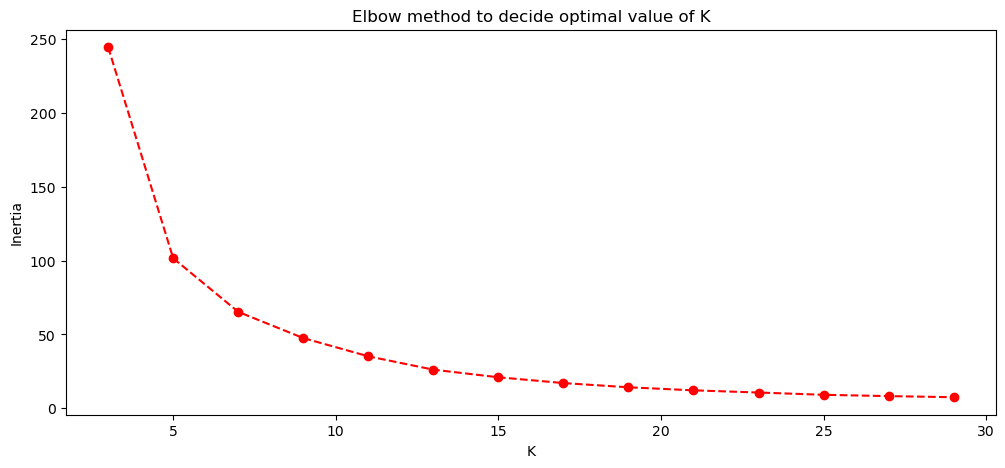

In [67]:
plt.figure(figsize= (12,5))
plt.plot(
    Ks,
    inertia,
    marker = 'o',
    linestyle = '--',
    color = 'red')

plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow method to decide optimal value of K')
plt.show()

In [77]:
km1 = KMeans(n_clusters = 10,
            max_iter = 100,
            random_state = 95)

km1.fit(data_pca)


C:\Users\ajjadhav\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=10, random_state=95)

In [78]:
mdf['Cluster'] = km1.labels_

In [79]:
df_pca = pd.DataFrame(data = data_pca, columns = ['PCA1','PCA2'])
df_pca['Cluster'] = km1.labels_
centers_pca = km1.cluster_centers_


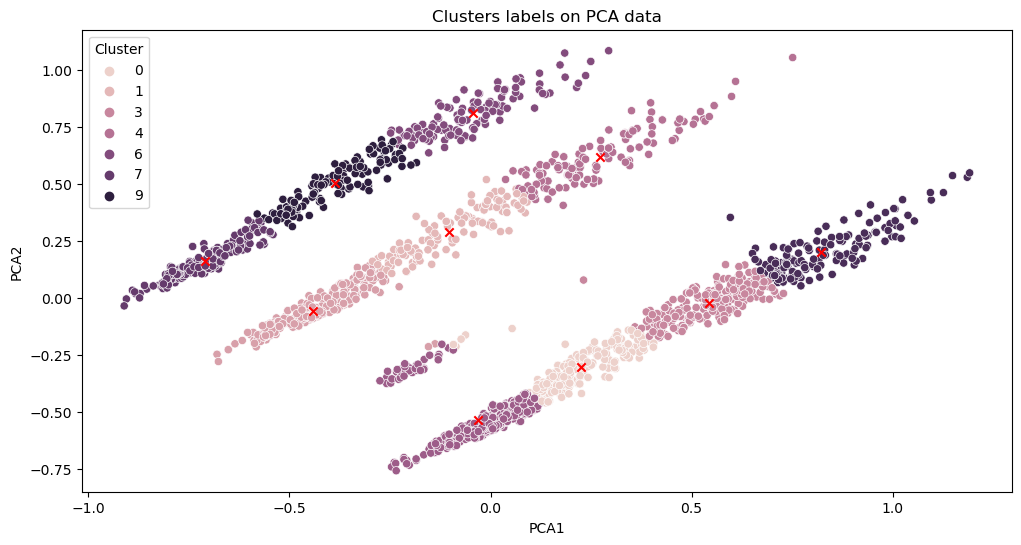

In [80]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df_pca,
            x = 'PCA1', 
            y = 'PCA2',
            hue = 'Cluster',
           markers = 'o')
plt.title('Clusters labels on PCA data')
plt.scatter(x = centers_pca[:,0], y = centers_pca[:,1], marker ='x', color = 'red') # Centroide
plt.show()

In [81]:
mdf.head()

,ID,Year_Birth,Age,Education,Marital_Status,No_Of_Kids,Income,Wines,Fruits,Meat,Fish,Sweet_Products,Gold_Products,Web,Catalog,Store,Complained?,Cluster
0,5524,1957,66,0,3,0,58138.0,635,88,546,172,88,88,8,10,4,0,8
1,2174,1954,69,0,3,2,46344.0,11,1,6,2,1,6,1,1,2,0,5
2,4141,1965,58,0,2,0,71613.0,426,49,127,111,21,42,8,2,10,0,3
3,6182,1984,39,0,2,1,26646.0,11,4,20,10,3,5,2,0,4,0,5
4,5324,1981,42,3,1,1,58293.0,173,43,118,46,27,15,5,3,6,0,9
